<a href="https://colab.research.google.com/github/Harshitha16-star/Customer-Support-Ticket/blob/main/Algorithmic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
# https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets

In [4]:
import pandas as pd
df = pd.read_csv("helpdesk_customer_multi_lang_tickets.csv")

In [5]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\nI am reaching out to ur...","Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\nIc...","Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,NaN,NaN,NaN


In [6]:
df.shape

(1566, 18)

In [7]:
df["language"].value_counts()

,count
language,
de,397
es,379
en,339
pt,229
fr,222


In [8]:
!pip install nltk

In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')


In [13]:
df = df[df['text'].str.strip() != '']

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

cleaned_texts = df['cleaned_text'].tolist()

In [15]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,text,cleaned_text
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN,Urgent: Critical impact on enterprise network ...,urgent critical impact enterprise network conn...
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN,Intermittent Cursor Freezing Issue on Dell XPS...,intermittent cursor freezing issue dell xps de...
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN,Dringend: Unterstützung für die Datenwiederher...,dringend unterstützung für die datenwiederhers...
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN,Anfrage zu den MacBook Air M1 Funktionen Sehr ...,anfrage zu den macbook air funktionen sehr gee...
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,Solicitação de Assistência com Erro de Instala...,solicitação de assistência com erro de instala...
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN,Exchange Request for Malfunctioning Dell XPS 1...,exchange request malfunctioning dell xps dear ...
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN,Request for Server Administration Assistance D...,request server administration assistance dear ...
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN,Immediate Attention Required: AWS Outage Conce...,immediate attention required aws outage concer...
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\nI am reaching out to ur...","Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN,"Urgent Assistance Needed Hello Support Team,\n...",urgent assistance needed hello support team re...
9,1033012757171,Anmeldeprobleme mit Micros

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
def create_tfidf_for_cleaned_text(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()

In [20]:
def create_tfidf_for_cleaned_text(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

In [21]:
tfidf_cleaned_text = create_tfidf_for_cleaned_text(df)
tfidf_cleaned_text.head()

,ab,abaixo,abbricht,abbuchung,abend,aber,aberto,abertos,abfragen,abgebrochen,...,übersehen,überwache,überwachen,überwacht,überwachung,überwiegend,üblichen,œuvre,высокую,производительность
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
tfidf_cleaned_text.shape

(1566, 12112)

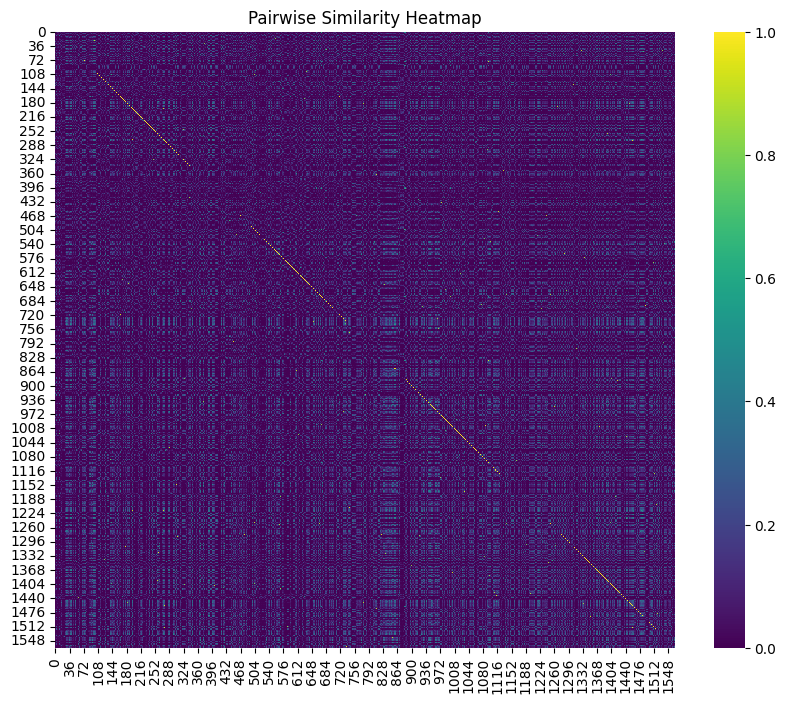

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

similarity_matrix = cosine_similarity(tfidf_cleaned_text)


similarity_df = pd.DataFrame(similarity_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="viridis")
plt.title("Pairwise Similarity Heatmap")
plt.show()


In [24]:
similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565
0,1.000000,0.076042,0.000000,0.000367,0.000456,0.041358,0.086203,0.171584,0.127879,0.007562,...,0.020778,0.001002,0.012804,0.008993,0.000961,0.166295,0.006588,0.001408,0.011134,0.000476
1,0.076042,1.000000,0.000000,0.003444,0.000387,0.119006,0.057415,0.085112,0.075043,0.009577,...,0.010403,0.003039,0.005097,0.006282,0.002915,0.058687,0.003134,0.004270,0.008126,0.003599
2,0.000000,0.000000,1.000000,0.077795,0.003472,0.000000,0.000000,0.000000,0.000000,0.085891,...,0.151919,0.125175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000367,0.003444,0.077795,1.000000,0.001586,0.001233,0.003609,0.001167,0.000967,0.297659,...,0.200446,0.208546,0.000494,0.000286,0.006346,0.001146,0.000524,0.001905,0.001047,0.002757
4,0.000456,0.000387,0.003472,0.001586,1.000000,0.000484,0.000743,0.004660,0.045075,0.009916,...,0.007105,0.000809,0.115881,0.084045,0.149406,0.000450,0.056462,0.163874,0.047203,0.077151


In [25]:
similarity_df.shape

(1566, 1566)